In [30]:
import pandas as pd
import os
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

<AxesSubplot:xlabel='date'>

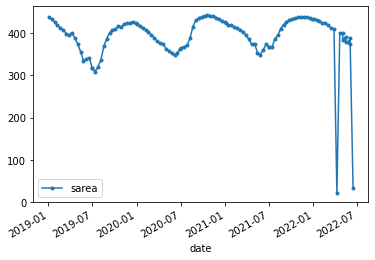

In [31]:
fn = "Nam_Ngum_1_12d_sar.csv"
sar = pd.read_csv(fn, parse_dates=['time']).rename({'time': 'date'}, axis=1)
sar['date'] = sar['date'].apply(lambda d: np.datetime64(d.strftime('%Y-%m-%d')))
sar.set_index('date', inplace=True)
sar.sort_index(inplace=True)

sar.plot(marker='.')

<AxesSubplot:xlabel='date'>

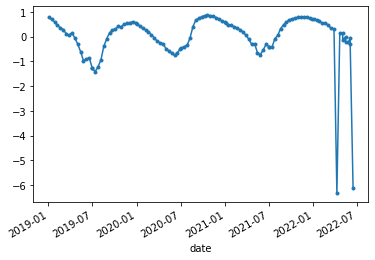

In [32]:
# rolling std
sar['std'] = zscore(sar['sarea'])
sar['std'].plot(marker='.')

In [33]:
zscore_lim = 3

sar.loc[(sar['std'] > zscore_lim) | (sar['std'] < -zscore_lim), 'sarea'] = np.nan
sar['sarea']

date
2019-01-02    437.124553
2019-01-14    432.419974
2019-01-26    426.794067
2019-02-07    418.169189
2019-02-19    413.065415
                 ...    
2022-05-15    379.214146
2022-05-27    378.745765
2022-06-03    387.395652
2022-06-03    375.045260
2022-06-15           NaN
Name: sarea, Length: 114, dtype: float64

In [34]:
sar['sarea'] = sar['sarea'].interpolate()
sar['sarea']

date
2019-01-02    437.124553
2019-01-14    432.419974
2019-01-26    426.794067
2019-02-07    418.169189
2019-02-19    413.065415
                 ...    
2022-05-15    379.214146
2022-05-27    378.745765
2022-06-03    387.395652
2022-06-03    375.045260
2022-06-15    375.045260
Name: sarea, Length: 114, dtype: float64